# Diamond Project

## Importaciones de librerias y exploración


In [1]:

%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
# El mantra de las visualizaciones
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')



from sklearn.model_selection import train_test_split as tts

from sklearn import metrics

from sklearn.linear_model import LinearRegression 

from sklearn.linear_model import Ridge, Lasso

from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.sample(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
1717,1717,0.31,Very Good,E,SI1,62.8,57.0,4.32,4.34,2.72,544
10181,10181,0.90,Fair,F,SI1,66.0,57.0,6.06,6.00,3.98,3160
1055,1055,0.70,Very Good,I,VS2,60.7,59.0,5.75,5.79,3.50,2025
17290,17290,0.35,Premium,H,SI2,62.0,58.0,4.50,4.47,2.78,551
13538,13538,0.33,Ideal,I,IF,61.6,55.0,4.47,4.46,2.75,891
7302,7302,1.20,Premium,G,VVS2,62.8,59.0,6.72,6.65,4.20,10053
10641,10641,1.22,Good,H,SI2,61.5,64.0,6.93,6.87,4.25,4782
15406,15406,0.79,Premium,H,VS1,60.0,60.0,6.07,5.99,3.64,2862
16162,16162,0.34,Ideal,D,I1,62.5,57.0,4.47,4.49,2.80,413
11713,11713,1.20,Ideal,I,SI1,62.2,57.0,6.80,6.77,4.22,4368


### Features
* id: only for test & sample submission files, id for prediction sample identification
* price: price in USD
* carat: weight of the diamond
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color: diamond colour
* clarity: a measurement of how clear the diamond is
* x: length in mm
* y: width in mm
* z: depth in mm
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table: width of top of diamond relative to widest point (43--95)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [5]:
train.describe()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.798406,61.744793,57.450157,5.733269,5.736107,3.539249,3939.026968
std,11678.496907,0.473424,1.430860,2.235814,1.120257,1.119260,0.693619,3995.017122
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,327.000000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,949.000000
50%,20227.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2404.000000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5331.000000
max,40454.000000,5.010000,79.000000,95.000000,10.740000,31.800000,6.980000,18818.000000


In [6]:
train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [7]:
train.color.unique()

array(['G', 'H', 'F', 'J', 'E', 'I', 'D'], dtype=object)

 ![Imagen](../img/escala-colores-fancy.png)

In [8]:
cambia_color = {'G':4, 'H':5, 'F':3, 'J':7, 'E':2, 'I':6, 'D':1}

In [9]:
train.clarity.unique()

array(['VVS2', 'VS2', 'VS1', 'SI2', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

 ![Imagen](../img/escala-gia-claridad-diamantes-1.jpg)

In [10]:
cambia_clarity = {'VVS2':3, 'VS2':5, 'VS1':4, 'SI2':7, 'SI1':6, 'VVS1':2, 'IF':1, 'I1':8}

In [11]:
train.cut.unique()

array(['Ideal', 'Fair', 'Very Good', 'Premium', 'Good'], dtype=object)

In [12]:
cambia_cut = {"Ideal":1, "Premium":2,"Very Good":3,"Good":4, "Fair":5}

In [13]:
train.color = train.color.replace(cambia_color)
train.clarity = train.clarity.replace(cambia_clarity)
train.cut = train.cut.replace(cambia_cut)

In [14]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.14,1,4,3,61.0,56.0,6.74,6.76,4.12,9013
1,1,0.76,1,5,5,62.7,57.0,5.86,5.82,3.66,2692
2,2,0.84,1,4,4,61.4,56.0,6.04,6.15,3.74,4372
3,3,1.55,1,5,4,62.0,57.0,7.37,7.43,4.59,13665
4,4,0.30,1,4,7,61.9,57.0,4.28,4.31,2.66,422


<AxesSubplot:>

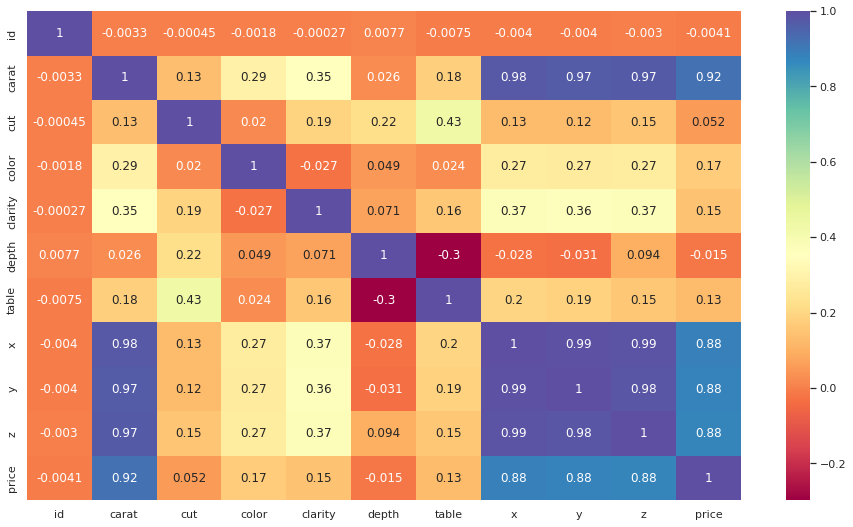

In [15]:
sns.heatmap(train.corr(),cmap="Spectral", annot= True)

In [16]:
train.shape

(40455, 11)

In [17]:
X = train.drop("price", axis=1)
X.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.14,1,4,3,61.0,56.0,6.74,6.76,4.12
1,1,0.76,1,5,5,62.7,57.0,5.86,5.82,3.66
2,2,0.84,1,4,4,61.4,56.0,6.04,6.15,3.74
3,3,1.55,1,5,4,62.0,57.0,7.37,7.43,4.59
4,4,0.30,1,4,7,61.9,57.0,4.28,4.31,2.66


In [18]:
y = train.price 
y.head()

0     9013
1     2692
2     4372
3    13665
4      422
Name: price, dtype: int64

## preparo el test

In [19]:
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.00,Fair,J,SI2,56.3,64.0,6.58,6.54,3.69
1,1,0.83,Premium,G,SI1,62.3,58.0,6.01,5.97,3.73
2,2,1.00,Fair,E,SI2,67.0,53.0,6.19,6.13,4.13
3,3,1.00,Fair,H,SI2,66.5,62.0,6.19,6.10,4.09
4,4,1.20,Very Good,I,SI1,62.6,57.0,6.74,6.77,4.23


In [20]:
test.color = test.color.replace(cambia_color)
test.clarity = test.clarity.replace(cambia_clarity)
test.cut = test.cut.replace(cambia_cut)

In [21]:
test.describe()

,id,carat,cut,color,clarity,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.796541,2.092918,3.575380,4.957805,61.763241,57.478265,5.724821,5.729782,3.537188
std,3892.928525,0.475782,1.108828,1.705137,1.636252,1.437858,2.230467,1.126277,1.208193,0.740783
min,0.000000,0.200000,1.000000,1.000000,1.000000,44.000000,44.000000,0.000000,0.000000,0.000000
25%,3371.000000,0.400000,1.000000,2.000000,4.000000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,6742.000000,0.700000,2.000000,4.000000,5.000000,61.900000,57.000000,5.690000,5.700000,3.520000
75%,10113.000000,1.040000,3.000000,5.000000,6.000000,62.500000,59.000000,6.530000,6.530000,4.030000
max,13484.000000,4.500000,5.000000,7.000000,8.000000,79.000000,73.000000,10.230000,58.900000,31.800000


In [23]:
X_test.shape

(13485, 10)

## Entreno varios modelos a ciegas por ver que funciona kaggle

In [24]:
X_train1, X_test1, y_train1, y_test1 = tts(X,y, test_size=0.2)

In [25]:
models={
    'linear': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'sgd': SGDRegressor(),
    'knn': KNeighborsRegressor(),
    'grad': GradientBoostingRegressor(),
}

In [26]:
for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X_train1, y_train1)

ENTRENANDO:  linear
ENTRENANDO:  ridge
ENTRENANDO:  lasso
ENTRENANDO:  sgd
ENTRENANDO:  knn
ENTRENANDO:  grad


In [29]:
#Podemos seguir el mismo proceso para realizar predicciones de cada algoritmo y sacar métricas
for name, model in models.items():
    y_pred1 = model.predict(X_test1)
    print(f"------{name}------")
    print('MAE - ', metrics.mean_absolute_error(y_test1, y_pred1))
    print('MSE - ', metrics.mean_squared_error(y_test1, y_pred1))
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
    print('R2 - ', metrics.r2_score(y_test1, y_pred1))

------linear------
MAE -  803.7110384204858
MSE -  1482926.3582533335
RMSE -  1217.7546379518878
R2 -  0.9095527644241558
------ridge------
MAE -  804.1555217200233
MSE -  1482364.8593553265
RMSE -  1217.5240693125236
R2 -  0.9095870115887712
------lasso------
MAE -  805.5666533443537
MSE -  1480417.4900662364
RMSE -  1216.7240813209198
R2 -  0.9097057863127238
------sgd------
MAE -  3.680627575370604e+16
MSE -  1.8118000280703156e+33
RMSE -  4.256524436756255e+16
R2 -  -1.1050602954297346e+26
------knn------
MAE -  2716.0912866147573
MSE -  14328044.084078606
RMSE -  3785.2402941000464
R2 -  0.12609822369051882
------grad------
MAE -  343.61252802682066
MSE -  377005.1107589983
RMSE -  614.0074191400282
R2 -  0.9770055540004832


En esta ocasion considero el mejor el grad, voy ha hacer una submision con el por el vacile, pero creo que se purede seguir rascando de los datos. 

In [30]:
grad = GradientBoostingRegressor()
grad

GradientBoostingRegressor()

Lo entreno con todos mis valores

In [31]:
grad.fit(X, y)

GradientBoostingRegressor()

In [32]:
y_pred_1 = grad.predict(test)

In [33]:
y_pred_1

array([2865.05121414, 2986.57682568, 4096.58620544, ..., 7488.90448758,
        503.03151434, 1069.2388063 ])

In [34]:
len(y_pred_1)

13485

In [35]:
mysub_1 = pd.DataFrame(y_pred_1)

In [36]:
mysub_1 = mysub_1.reset_index()

In [37]:
mysub_1.columns = ['id', 'price']

In [38]:
mysub_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      13485 non-null  int64  
 1   price   13485 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 210.8 KB


In [39]:
mysub_1.to_csv('../data/mysub_1_normal.csv', index = False)

In [ ]:
help(GradientBoostingRegressor())

## Ecuentro problemas en kaggle submision, escribo a Ana en la noche, ella y Jean lo solucionan en la morning , creando una nueva competicion, ahora todo funciona. 


### vamos a ver si quitando todas  las columna colineales va mejor


In [41]:
X2 = train.drop(["id", "carat",'x', 'y', 'z', 'price'], axis=1)

In [42]:
X2.head()

,cut,color,clarity,depth,table
0,1,4,3,61.0,56.0
1,1,5,5,62.7,57.0
2,1,4,4,61.4,56.0
3,1,5,4,62.0,57.0
4,1,4,7,61.9,57.0


In [43]:
X_train2, X_test2, y_train2, y_test2 = tts(X2,y, test_size=0.2)

In [44]:
models={
    'linear': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'sgd': SGDRegressor(),
    'knn': KNeighborsRegressor(),
    'grad': GradientBoostingRegressor(),
}

In [45]:
for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X_train2, y_train2)

ENTRENANDO:  linear
ENTRENANDO:  ridge
ENTRENANDO:  lasso
ENTRENANDO:  sgd
ENTRENANDO:  knn
ENTRENANDO:  grad


In [47]:
for name, model in models.items():
    y_pred2 = model.predict(X_test2)
    print(f"------{name}------")
    print('MAE -  ', metrics.mean_absolute_error(y_test2, y_pred2))
    print('MSE -  ', metrics.mean_squared_error(y_test2, y_pred2))
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
    print('R2 -   ', metrics.r2_score(y_test2, y_pred2))

------linear------
MAE -   2861.9008021170816
MSE -   15075511.212190866
RMSE -  3882.719563938512
R2 -    0.06396259825423334
------ridge------
MAE -   2861.901665968843
MSE -   15075511.954625469
RMSE -  3882.7196595460596
R2 -    0.06396255215652258
------lasso------
MAE -   2861.9947539996465
MSE -   15075709.720161568
RMSE -  3882.745126860836
R2 -    0.06395027290867739
------sgd------
MAE -   41347074.03205846
MSE -   2954533271564939.0
RMSE -  54355618.58322412
R2 -    -183446756.32460007
------knn------
MAE -   2908.295513533556
MSE -   16468507.072188852
RMSE -  4058.1408393732286
R2 -    -0.022528414029364896
------grad------
MAE -   2807.6662912708075
MSE -   14613577.667584958
RMSE -  3822.770941030205
R2 -    0.09264401865757443


## parece que no funciona bien, los valores se desmadran... 


In [48]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
tree_reg = DecisionTreeRegressor(max_depth=8)

In [77]:
X3 = X.drop('id', axis=1)

In [78]:
y3 = y

In [79]:
X3.sample(1)

,carat,cut,color,clarity,depth,table,x,y,z
19219,0.31,2,4,2,60.7,58.0,4.37,4.4,2.66


In [101]:
X3 = train.drop(["carat",'x', 'y', 'z'], axis=1)

In [102]:
X3

,id,cut,color,clarity,depth,table,price
0,0,1,4,3,61.0,56.0,9013
1,1,1,5,5,62.7,57.0,2692
2,2,1,4,4,61.4,56.0,4372
3,3,1,5,4,62.0,57.0,13665
4,4,1,4,7,61.9,57.0,422
...,...,...,...,...,...,...,...
40450,40450,1,2,2,60.8,57.0,1278
40451,40451,1,7,7,61.6,55.0,924
40452,40452,3,2,6,59.4,63.0,5322
40453,40453,3,2,4,62.9,56.0,1942


In [103]:
X_train3, X_test3, y_train3, y_test3 = tts(X3,y3, test_size=0.2)

In [104]:
tree_reg.fit(X_train3, y_train3)

DecisionTreeRegressor(max_depth=20)

In [105]:
y_pred3 = tree_reg.predict(X_test3)

In [106]:
metrics.mean_squared_error(y_test3, y_pred3)

2.942652329749104

In [107]:
results = []

for depth in range(1,21):
    tree_reg = DecisionTreeRegressor(max_depth=depth)
    tree_reg.fit(X_train3,y_train3)
    
    result = {
        "model": tree_reg,
        "depth": depth,
        "train_error": metrics.mean_squared_error(y_train3, tree_reg.predict(X_train3)),
        "test_error": metrics.mean_squared_error(y_test3, tree_reg.predict(X_test3))
    }
    results.append(result)

In [108]:
df = pd.DataFrame(results)

In [109]:
display(df)

,model,depth,train_error,test_error
0,DecisionTreeRegressor(max_depth=1),1,4.532147e+06,4.591676e+06
1,DecisionTreeRegressor(max_depth=2),2,1.069014e+06,1.059627e+06
2,DecisionTreeRegressor(max_depth=3),3,2.594777e+05,2.678688e+05
3,DecisionTreeRegressor(max_depth=4),4,6.486328e+04,6.649428e+04
4,DecisionTreeRegressor(max_depth=5),5,1.653492e+04,1.680887e+04
5,DecisionTreeRegressor(max_depth=6),6,4.093329e+03,4.143855e+03
6,DecisionTreeRegressor(max_depth=7),7,1.025254e+03,1.076458e+03
7,DecisionTreeRegressor(max_depth=8),8,2.558448e+02,2.765148e+02
8,DecisionTreeRegressor(max_depth=9),9,6.056011e+01,6.972620e+01
9,DecisionTreeRegressor(max_depth=10),10,1.417467e+01,1.813135e+01


Estoy haciendo algo mal. Tendre que normalizar?
El 8 puede ser bueno


In [130]:
tree_reg = DecisionTreeRegressor(max_depth=8)
tree_reg.fit(X_train3,y_train3)

DecisionTreeRegressor(max_depth=8)

In [133]:
print("train_error", metrics.mean_squared_error(y_train3, tree_reg.predict(X_train3)), '\n'
        "test_error", metrics.mean_squared_error(y_test3, tree_reg.predict(X_test3)))

train_error 255.84477526167822 
test_error 276.5148195444086


In [ ]:
Entreno mi arbolito en serio con todo

In [142]:
X.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.14,1,4,3,61.0,56.0,6.74,6.76,4.12
1,1,0.76,1,5,5,62.7,57.0,5.86,5.82,3.66
2,2,0.84,1,4,4,61.4,56.0,6.04,6.15,3.74
3,3,1.55,1,5,4,62.0,57.0,7.37,7.43,4.59
4,4,0.30,1,4,7,61.9,57.0,4.28,4.31,2.66


In [143]:
X_ar = X

In [144]:
X_ar = X_ar.drop(["id", "carat",'x', 'y', 'z'], axis=1)
X_ar.head()

,cut,color,clarity,depth,table
0,1,4,3,61.0,56.0
1,1,5,5,62.7,57.0
2,1,4,4,61.4,56.0
3,1,5,4,62.0,57.0
4,1,4,7,61.9,57.0


In [145]:
arbolico = DecisionTreeRegressor(max_depth=8)
arbolico.fit(X_ar,y)

DecisionTreeRegressor(max_depth=8)

In [150]:
X_test_ar = X_test.drop(["id", "carat",'x', 'y', 'z'], axis=1)
X_test_ar.head()

,cut,color,clarity,depth,table
0,5,7,7,56.3,64.0
1,2,4,6,62.3,58.0
2,5,2,7,67.0,53.0
3,5,5,7,66.5,62.0
4,3,6,6,62.6,57.0


In [153]:
y_pred_ar = arbolico.predict(X_test_ar)

In [155]:
len(y_pred_ar)

13485

In [ ]:
y_pred_ar

In [156]:
mysub_8 = pd.DataFrame(y_pred_ar)
mysub_8 = mysub_8.reset_index()
mysub_8.columns = ['id', 'price']

In [157]:
mysub_8.head()

,id,price
0,0,8072.608939
1,1,4623.579869
2,2,3827.785714
3,3,6018.460396
4,4,4139.619760


In [158]:
mysub_8.to_csv('../data/mysub_8.csv', index = False)

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
X4 = train.drop(['id', 'price', 'carat', 'x', 'y', 'z', ], axis=1)

In [121]:
X4

,cut,color,clarity,depth,table
0,1,4,3,61.0,56.0
1,1,5,5,62.7,57.0
2,1,4,4,61.4,56.0
3,1,5,4,62.0,57.0
4,1,4,7,61.9,57.0
...,...,...,...,...,...
40450,1,2,2,60.8,57.0
40451,1,7,7,61.6,55.0
40452,3,2,6,59.4,63.0
40453,3,2,4,62.9,56.0


In [123]:
X4_train, X4_test, y4_train, y4_test = tts(X4,y3, test_size=0.20)

In [124]:
X4_train

,cut,color,clarity,depth,table
23409,1,4,4,61.8,56.0
4042,2,2,7,61.0,58.0
1558,1,1,7,62.0,57.0
39699,3,2,5,62.6,59.0
27508,2,2,5,62.3,58.0
...,...,...,...,...,...
39190,2,5,7,62.6,60.0
22965,1,6,2,61.9,55.0
5459,4,2,6,63.5,57.0
1629,3,6,5,62.2,59.0


In [125]:
mms=MinMaxScaler()

In [126]:
X4_train=mms.fit_transform(X4_train)
X4_test=mms.transform(X4_test)

In [127]:
X4_train


array([[0.        , 0.5       , 0.42857143, 0.52222222, 0.25      ],
       [0.25      , 0.16666667, 0.85714286, 0.5       , 0.28846154],
       [0.        , 0.        , 0.85714286, 0.52777778, 0.26923077],
       ...,
       [0.75      , 0.16666667, 0.71428571, 0.56944444, 0.26923077],
       [0.5       , 0.83333333, 0.57142857, 0.53333333, 0.30769231],
       [0.25      , 0.33333333, 0.57142857, 0.51111111, 0.32692308]])

In [128]:
for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X4_train, y4_train)

ENTRENANDO:  linear
ENTRENANDO:  ridge
ENTRENANDO:  lasso
ENTRENANDO:  sgd
ENTRENANDO:  knn
ENTRENANDO:  grad


In [129]:
for name, model in models.items():
    y4_pred = model.predict(X4_test)
    print(f"------{name}------")
    print('MAE -  ', metrics.mean_absolute_error(y4_test, y4_pred))
    print('MSE -  ', metrics.mean_squared_error(y4_test, y4_pred))
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)))
    print('R2 -   ', metrics.r2_score(y4_test, y4_pred))

------linear------
MAE -   2873.4821628616414
MSE -   15009155.395320917
RMSE -  3874.165122361322
R2 -    0.05826558450158981
------ridge------
MAE -   2873.71987002739
MSE -   15009544.231373012
RMSE -  3874.2153052422127
R2 -    0.058241187373130554
------lasso------
MAE -   2874.5454647439788
MSE -   15010680.205498796
RMSE -  3874.361909463131
R2 -    0.05816991181490028
------sgd------
MAE -   2897.8388764467795
MSE -   15035529.243706593
RMSE -  3877.5674389630663
R2 -    0.056610783812293786
------knn------
MAE -   2935.2769496971946
MSE -   16776925.669514276
RMSE -  4095.9645591135522
R2 -    -0.05265138997533092
------grad------
MAE -   2819.474634451144
MSE -   14460737.112877557
RMSE -  3802.7275885708086
R2 -    0.0926755400961895


## emperora 

 ## veremos en el arbol  de decison

## preparo el test

In [ ]:
test.color = test.color.replace(cambia_color)
test.clarity = test.clarity.replace(cambia_clarity)
test.cut = test.cut.replace(cambia_cut)
test_cachas = test.drop(['id',"carat",'x', 'y', 'z'], axis=1)

In [ ]:
test.sample()

In [ ]:
test_cachas.sample()

In [ ]:
lasso = Lasso()

In [ ]:
lasso.fit(X, y)

In [ ]:
y_pred1 = lasso.predict(test_cachas)

In [ ]:
len(y_pred)


In [ ]:
y_pred1

In [ ]:
mando_yo = pd.DataFrame(y_pred)
mando_yo

In [ ]:
mando_yo = mando_yo.reset_index()
mando_yo.columns = ['id', 'price']
mando_yo 

In [ ]:


mando_yo.to_csv('../data/mando_yo2.csv', index = False)

In [ ]:
grad2 = GradientBoostingRegressor()

In [ ]:
grad2.fit(X, y)

In [ ]:
y_pred3 = grad2.predict(test_cachas)

In [ ]:
len(y_pred3)

In [ ]:
y_pred3

In [ ]:
mando_yo3 = pd.DataFrame(y_pred3)
mando_yo3

In [ ]:
mando_yo3 = mando_yo3.reset_index()
mando_yo3

In [ ]:
mando_yo3.columns = ['id', 'price']

In [ ]:
mando_yo3.to_csv('../data/mando_yo3.csv', index = False)


In [ ]:
train_new= pd.read_csv('../data/new_train.csv')

In [ ]:
sns.heatmap(train_new.corr(),cmap="Spectral", annot= True)

In [ ]:
y = train_new['price']

In [ ]:
to_drop = ['x', 'y', 'z', 'carat', 'price', 'Unnamed: 0', 'id']

In [ ]:
X = train_new.drop(to_drop, axis=1)

In [ ]:
X.head()

In [ ]:
X.shape

In [ ]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)

In [ ]:
for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X_train, y_train)

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name}------")
    print('MAE -  ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE -  ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 -   ', metrics.r2_score(y_test, y_pred))